# Music Features Over the Decades - Python Script

Analyze trends and statistical features in popular music from 1950–2019 using Python, data analysis, and visualization libraries.

### Objectives
* This project loads a large CSV dataset with 28,000+ tracks and 31 columns, including metadata like artist, genre, release date, lyrics, and musical features (loudness, energy, acousticness, danceability, valence, etc.).  
* It offers code for importing/cleaning the data, basic stats, grouped means by year/decade, and visualizations of music trends over time.

## Features

- **Dataset Loading:** Handles large .csv files with memory optimization.
- **Data Inspection:** Shows shape, data types, missing values.
- **Columns for Analysis:** Adds ‘decade’ column, drops NAs.
- **Descriptive Statistics:** Mean, median, std for loudness/energy.
- **Trends by Year/Decade:** Grouped stats, song counts per decade.
- **Visualizations:**
  - Line plot: *Average Loudness by Decade*
  - Bar plot: *Number of Tracks per Decade*
  - Scatter plot: *Tempo vs Loudness* (if available)**
  - Heatmap: *Feature correlations*  
  - Interactive Plotly: *Loudness vs Energy*, *Boxplot Loudness by Decade*

1. First, import several Python libraries for data manipulation, analysis, and visualization:

In [159]:
# Importing in pandas, numpy, matplotlib, seaborn and plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

2. Grab .csv from file path and read it, allocate memory as not low, make DataFrame

In [160]:
# Loading the dataset from a local source
file_path = r"C:\Users\dunca\OneDrive\Documents\vS_code_repository_code_institute\music_project\data\tcc_ceds_music.csv"

# Managing a large .csv, allocating memory, making df DataFrame
df = pd.read_csv(file_path, low_memory=False)

3. Viewing .csv to review dataset

In [161]:
# View the first 5 rows of the dataset
print(df.shape)
df.head()

(28372, 31)


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


4. Checking the variety of data types to help plan and visualise further steps.

In [162]:
# Check the variety of data types
cell_types = df.map(lambda x: type(x).__name__)
print(cell_types)

      Unnamed: 0 artist_name track_name release_date genre lyrics  len dating  \
0            int         str        str          int   str    str  int  float   
1            int         str        str          int   str    str  int  float   
2            int         str        str          int   str    str  int  float   
3            int         str        str          int   str    str  int  float   
4            int         str        str          int   str    str  int  float   
...          ...         ...        ...          ...   ...    ...  ...    ...   
28367        int         str        str          int   str    str  int  float   
28368        int         str        str          int   str    str  int  float   
28369        int         str        str          int   str    str  int  float   
28370        int         str        str          int   str    str  int  float   
28371        int         str        str          int   str    str  int  float   

      violence world/life  

5. Unused step - Converting release_date into datetime

In [163]:
# This was meant to convert "release_date"  integer column to pandas datetime format, but it ended up not being valid as it caused an error in the "decades" column later
# df['release_year'] = pd.to_datetime(df['release_date']).dt.year

6. First run of descriptive statistics
* Count
* Mean
* Standard Deviation
* Minimum
* 25%, 50%, 75%: Quartiles
* Maximum

In [164]:
# Describing some of the stats
print(df[['release_date', 'loudness', 'energy']].describe())

       release_date      loudness        energy
count  28372.000000  28372.000000  28372.000000
mean    1990.236888      0.665249      0.569875
std       18.487463      0.108434      0.244385
min     1950.000000      0.000000      0.000000
25%     1975.000000      0.595364      0.380361
50%     1991.000000      0.679050      0.580567
75%     2007.000000      0.749026      0.772766
max     2019.000000      1.000000      1.000000


7. Making a "decade" column to condense and provide an overview of analytics over time

In [165]:
# Creates a decade column with floor division of the release_year variable
df['decade'] = (df['release_date'] // 10) * 10

8. Clean up data by dropping those with missing values

In [166]:
# Drop out rows with missing  values
df = df.dropna(subset=['release_date', 'loudness', 'energy'])

9. Generate a cleaned up version of the music data .csv

In [167]:
# Placing the .csv in the allocated local folder
df.to_csv(r"C:\Users\dunca\OneDrive\Documents\vS_code_repository_code_institute\music_project\data\cleaned_music_data.csv", index=False)

10. Attempted to analyse "Average loudness" and "Number of songs" by release date.
* It then did it year by year, which provided too many rows for easily viewable data, and that would affect visualisation down the line.
* In the next step, I condense it by decade.

In [168]:
# Average loudness and energy by release date
decade_stats = df.groupby('release_date')[['loudness', 'energy']].mean().reset_index()
print(decade_stats)

# Number of songs per release date
tracks_per_decade = df['release_date'].value_counts().sort_index()
print(tracks_per_decade)


    release_date  loudness    energy
0           1950  0.566895  0.261644
1           1951  0.583148  0.272032
2           1952  0.569761  0.267863
3           1953  0.566767  0.304760
4           1954  0.565076  0.248286
..           ...       ...       ...
65          2015  0.739006  0.669541
66          2016  0.730245  0.647271
67          2017  0.732927  0.647258
68          2018  0.736358  0.650346
69          2019  0.735271  0.676547

[70 rows x 3 columns]
release_date
1950     51
1951     58
1952     60
1953     48
1954    109
       ... 
2015    617
2016    533
2017    660
2018    653
2019    534
Name: count, Length: 70, dtype: int64


11. Analysing Loudness and Songs by decade, using means and value counts

In [169]:
# Average loudness and energy by decade
decade_stats = df.groupby('decade')[['loudness', 'energy']].mean().reset_index()
print(decade_stats)

# Number of songs per decade
tracks_per_decade = df['decade'].value_counts().sort_index()
print(tracks_per_decade)


   decade  loudness    energy
0    1950  0.588890  0.312325
1    1960  0.613339  0.414836
2    1970  0.618376  0.524892
3    1980  0.624366  0.583139
4    1990  0.661032  0.586370
5    2000  0.725510  0.655217
6    2010  0.735586  0.665913
decade
1950    1468
1960    3409
1970    3951
1980    4675
1990    4457
2000    4781
2010    5631
Name: count, dtype: int64


12. Analysing the Mean, Median and Standard Deviation of Loudness and Energy by Year.

In [170]:
yearly_stats = df.groupby('release_date')[['loudness','energy']].agg(['mean','median','std']).reset_index()
print(yearly_stats)

   release_date  loudness                        energy                    
                     mean    median       std      mean    median       std
0          1950  0.566895  0.609697  0.107152  0.261644  0.228204  0.147406
1          1951  0.583148  0.589160  0.085088  0.272032  0.235712  0.166882
2          1952  0.569761  0.586622  0.093627  0.267863  0.247724  0.142163
3          1953  0.566767  0.559457  0.115447  0.304760  0.276254  0.154568
4          1954  0.565076  0.571161  0.100631  0.248286  0.211187  0.169832
..          ...       ...       ...       ...       ...       ...       ...
65         2015  0.739006  0.752352  0.070416  0.669541  0.700691  0.189043
66         2016  0.730245  0.744866  0.080013  0.647271  0.663653  0.199416
67         2017  0.732927  0.750763  0.076646  0.647258  0.674665  0.190904
68         2018  0.736358  0.747327  0.069072  0.650346  0.674665  0.189820
69         2019  0.735271  0.746378  0.074512  0.676547  0.698689  0.176812

[70 rows x 

12. Using matplotlib and seaborn, make a line plot graph of Average Loudness by Decade.

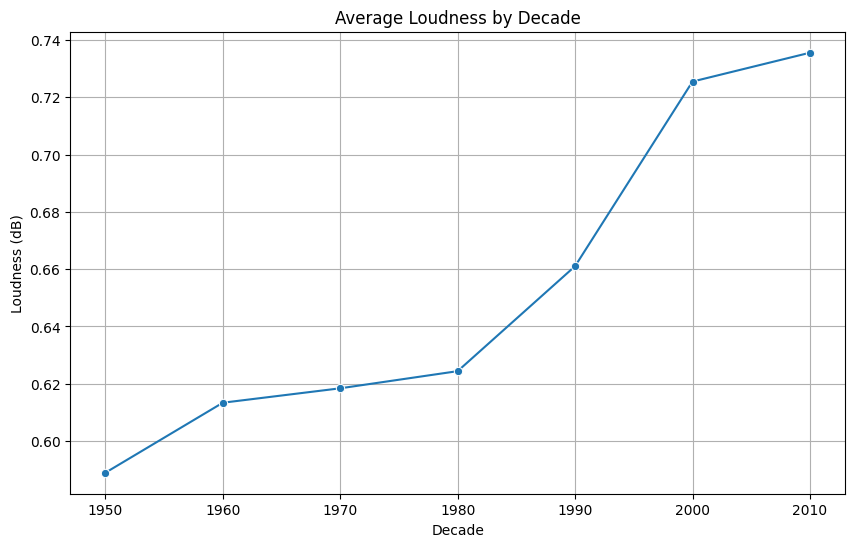

In [171]:
# Line chart: Average loudness by decade
plt.figure(figsize=(10,6))
sns.lineplot(data=decade_stats, x='decade', y='loudness', marker='o')
plt.title('Average Loudness by Decade')
plt.xlabel('Decade')
plt.ylabel('Loudness (dB)')
plt.grid(True)
plt.show()

12. Using matplotlib and seaborn, making a bar chart of Number of songs per Decade with the "Viridis" palette.

C:\Users\dunca\AppData\Local\Temp\ipykernel_11680\4041865983.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




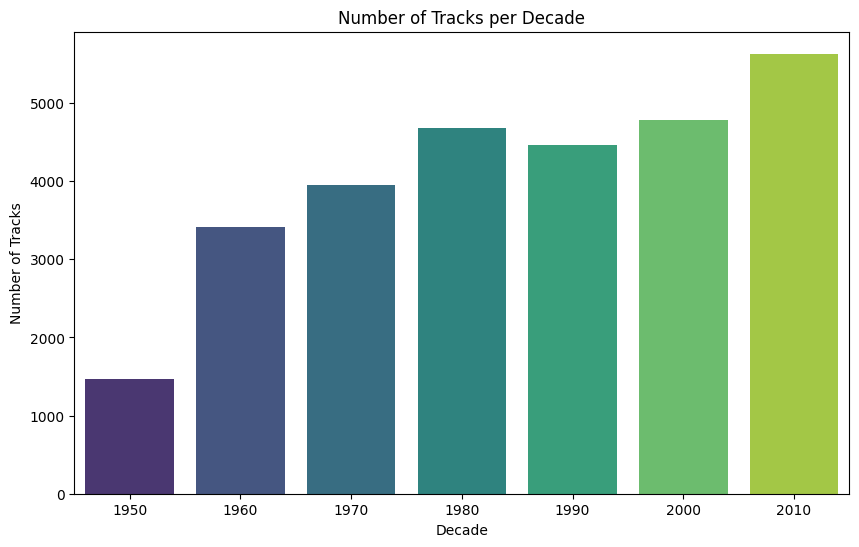

In [172]:
# Bar chart: Number of songs per decade
plt.figure(figsize=(10,6))
sns.barplot(x=tracks_per_decade.index, y=tracks_per_decade.values, palette='viridis')
plt.title('Number of Tracks per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Tracks')
plt.show()

13. Failed scatter plot of Energy against Loudness by Decade.
* While this shows that Energy increases by Loudness, it didn't show how each decade performed well.

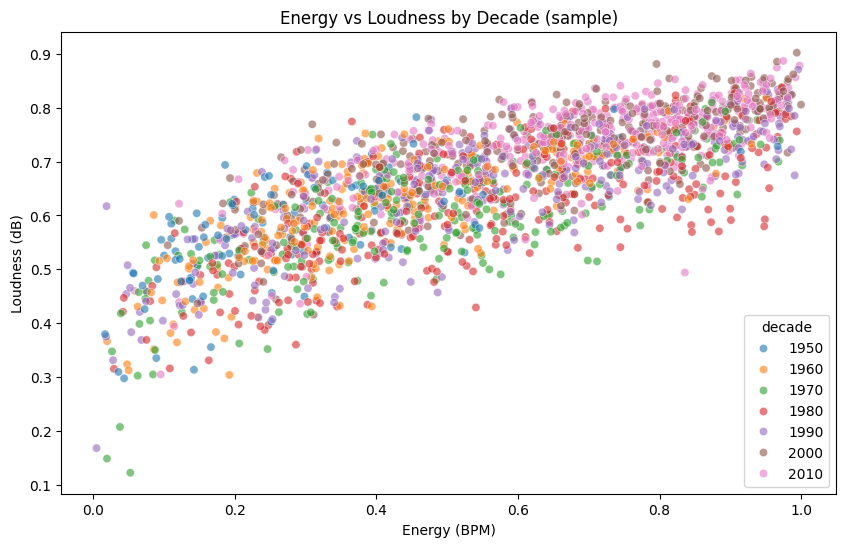

In [194]:
# Scatter plot: Energy vs Loudness (if tempo available)
if 'energy' in df.columns:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df.sample(2000), x='energy', y='loudness', hue='decade', palette='tab10', alpha=0.6)
    plt.title('Energy vs Loudness by Decade (sample)')
    plt.xlabel('Energy (BPM)')
    plt.ylabel('Loudness (dB)')
    plt.show()

14. Using matplotlib and seaborn, making a Heat Map to correlate Loudness, Energy, Danceability, Acousticness and Valence. 

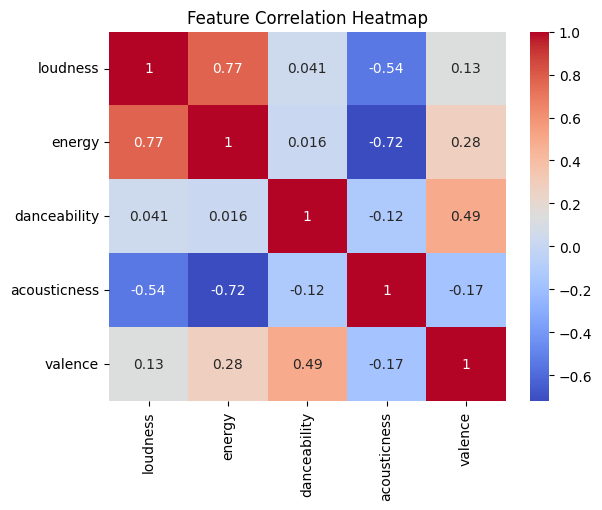

In [195]:
# Heatmap: Feature correlation
features = ['loudness','energy','danceability','acousticness','valence']
available = [f for f in features if f in df.columns]
sns.heatmap(df[available].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

15. Using Plotly to make interactive scatter and box plot charts.

In [198]:
# Interactive scatter: loudness vs energy
fig = px.scatter(df.sample(2000),
                 x='energy', y='loudness',
                 color='decade',
                 title='Loudness vs Energy (Interactive)')
fig.show()

# Interactive box plot: loudness by decade
fig = px.box(df, x='decade', y='loudness',
             title='Loudness Distribution by Decade')
fig.show()

